# 1. 서울 CCTV 데이터 분석

### 1 - 1. CCTV 데이터 불러와서 살펴보기

In [2]:
import pandas as pd

In [3]:
# CSV 데이터 불러오기
# encoding error 발생시 utf-8 or euc-kr or utf-8-sig 사용 바람.

CCTV_Seoul = pd.read_csv("../data/Seoul_CCTV.csv", encoding="utf-8")

In [4]:
# 상위 5개 출력, 괄호안에 숫자 넣으면 숫자 개수만큼 출력

CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
# 하위 5개 출력, 괄호안에 숫자 넣으면 숫자 개수만큼 출력

CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


### 1-2. CCTV 데이터 튜닝
    - "기관명" 컬럼명을 "구별"로 변경
    - 2013년 대비 2014 ~ 2016까지의 CCTV 개수 증가율을 보여주는 새로운 컬럼을 추가

In [6]:
# "기관명" 컬럼명을 "구별"로 변경

CCTV_Seoul.rename(
    columns= {CCTV_Seoul.columns[0] : "구별"}, # columns : 컬럼명을 리스트로 반환해줌.
    inplace = True # 변경 값을 저장, False면 원본데이터 변경 안됨.
)

# 변경됨을 확인
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [7]:
# CCTV 개수 증가율 컬럼 추가, 기존 컬럼이 있다면 수정, 없으면 추가됨
# "2014 + 2015 + 2016 CCTV 개수 / 2013년도 이전"

CCTV_Seoul["최근 증가율"] = (
    round(  # round(숫자, 반올림자리)
        (CCTV_Seoul["2014년"]+CCTV_Seoul["2015년"]+CCTV_Seoul["2016년"])/ CCTV_Seoul["2013년도 이전"] * 100,
        2)
)

# 추가됨을 확인
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.62
1,강동구,1010,379,99,155,377,166.49


---

---

# 2. 서울 인구 현황 데이터 분석

### 2-1. 서울 인구 현황 데이터 불러와서 살펴보기

In [8]:
import pandas as pd

In [9]:
# 엑셀데이터 불러오기

pop_Seoul = pd.read_excel("../data/Seoul_Population.xls")

In [10]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


In [11]:
pop_Seoul.tail()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
23,2017,관악구,255352,520929,262006,258923,503297,253661,249636,17632,8345,9287,1.97,70046
24,2017,서초구,173594,445401,213422,231979,441102,211236,229866,4299,2186,2113,2.54,53205
25,2017,강남구,231612,561052,268941,292111,556164,266442,289722,4888,2499,2389,2.4,65060
26,2017,송파구,264628,671173,326407,344766,664496,323147,341349,6677,3260,3417,2.51,76582
27,2017,강동구,177407,440359,218699,221660,436223,216777,219446,4136,1922,2214,2.46,56161


### 2-2. 서울 인구 현황 데이터 튜닝
- 행 데이터
    - 0 ~ 2 행은 필요 없으니 빼자.
- 컬럼 데이터
    - 필요한 컬럼을 선택
        - 지역구 이름, 총 인구수, 한국인합계, 외국인합계, 고령자합계가 필요해 보임.
        - 원하는 컬럼을 추출 후 컬럼명 알맞게 변경.
- 총 인구수 대비 외국인 비율, 고령자 비율 컬럼을 추가
``` 
< 원본 데이터의 필요한 컬럼명 >
지역구 이름 = 자치구
총 인구수 =  인구
한국인 합계 = 인구.3
외국인 합계 = 인구.6
고령자 합계 = 65세이상고령자
```
    

In [12]:
# 필요한 컬럼과 행의 데이터만 불러오기

pop_Seoul = pd.read_excel(
    "../data/Seoul_Population.xls",
    header = 2, # 2행 부터 불러오기
    usecols = "B, D, G, J, N" # 지정한 컬럼만 불러오기
)

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [13]:
# 컬럼명 알맞게 변경

pop_Seoul.rename(
    columns = {
        pop_Seoul.columns[0] : "구별",
        pop_Seoul.columns[1] : "인구수",
        pop_Seoul.columns[2] : "한국인",
        pop_Seoul.columns[3] : "외국인",
        pop_Seoul.columns[4] : "고령자"
    },
    inplace = True
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [14]:
# 합계 행 제거

pop_Seoul = pop_Seoul[1:]
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [15]:
# 외국인 비율, 고령자 비율 열 추가

pop_Seoul["외국인 비율"] = round(pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100,2)
pop_Seoul["고령자 비율"] = round(pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100,2)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,164257,154770,9487,26182,5.78,15.94
2,중구,134593,125709,8884,21384,6.60,15.89
3,용산구,244444,229161,15283,36882,6.25,15.09
4,성동구,312711,304808,7903,41273,2.53,13.20
5,광진구,372298,357703,14595,43953,3.92,11.81


---

---

# 3. CCTV 현황 데이터 + 인구 현황 데이터

### 3-1. 합치기

- pd.merge(A,B, on="key")
    - A와 B를 key 컬럼을 기준으로 합쳐라.


In [16]:
# 두 데이터를 구별 컬럼을 기준으로 합치기

data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = "구별" )
data_result.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.62,561052,556164,4888,65060,0.87,11.60
1,강동구,1010,379,99,155,377,166.49,440359,436223,4136,56161,0.94,12.75
2,강북구,831,369,120,138,204,125.20,328002,324479,3523,56530,1.07,17.23
3,강서구,911,388,258,184,81,134.79,608255,601691,6564,76032,1.08,12.50
4,관악구,2109,846,260,390,613,149.29,520929,503297,17632,70046,3.38,13.45


### 3-2. 합친 결과 데이터 튜닝
- 년도별 컬럼은 제거
- "구별" 컬럼을 인덱스로 지정
- 인구대비 CCTV 개수 컬럼을 추가

In [17]:
del data_result["2013년도 이전"]
del data_result["2014년"]
data_result.drop(["2015년", "2016년"], axis = 1,inplace = True)
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,150.62,561052,556164,4888,65060,0.87,11.60
1,강동구,1010,166.49,440359,436223,4136,56161,0.94,12.75
2,강북구,831,125.20,328002,324479,3523,56530,1.07,17.23
3,강서구,911,134.79,608255,601691,6564,76032,1.08,12.50
4,관악구,2109,149.29,520929,503297,17632,70046,3.38,13.45


In [18]:
#  구별 컬럼을 데이터 프레임의 인덱스로 지정하기
data_result.set_index("구별",inplace=True)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.62,561052,556164,4888,65060,0.87,11.60
강동구,1010,166.49,440359,436223,4136,56161,0.94,12.75
강북구,831,125.20,328002,324479,3523,56530,1.07,17.23
강서구,911,134.79,608255,601691,6564,76032,1.08,12.50
관악구,2109,149.29,520929,503297,17632,70046,3.38,13.45


In [19]:
# 인구수 대비 CCTV 개수 컬럼 추가

data_result["CCTV 비율"] = data_result["소계"]  / data_result["인구수"] * 100
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
구별,,,,,,,,,
강남구,3238,150.62,561052,556164,4888,65060,0.87,11.60,0.577130
강동구,1010,166.49,440359,436223,4136,56161,0.94,12.75,0.229358
강북구,831,125.20,328002,324479,3523,56530,1.07,17.23,0.253352
강서구,911,134.79,608255,601691,6564,76032,1.08,12.50,0.149773
관악구,2109,149.29,520929,503297,17632,70046,3.38,13.45,0.404854


---

---

# 4. 결과 데이터 시각화

### 4 - 1. 필요 모듈 불러오기, 한글화 작업

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False #=> 마이너스 부호 꺠짐 해결

# 주피터노트북 환경에서 그래프를 그리게 하며 두 줄 같은 의미, 현 개발환경에 내재되어 사실은 필요하지 않음
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

### 4 - 2. 막대그래프로 데이터 시각화 및 분석
- CCTV가 많은 순으로 정렬
- CCTV 비율이 높은 순으로 정렬(인구수대비 CCTV가 많은 구, 위에서 만든 컬럼)

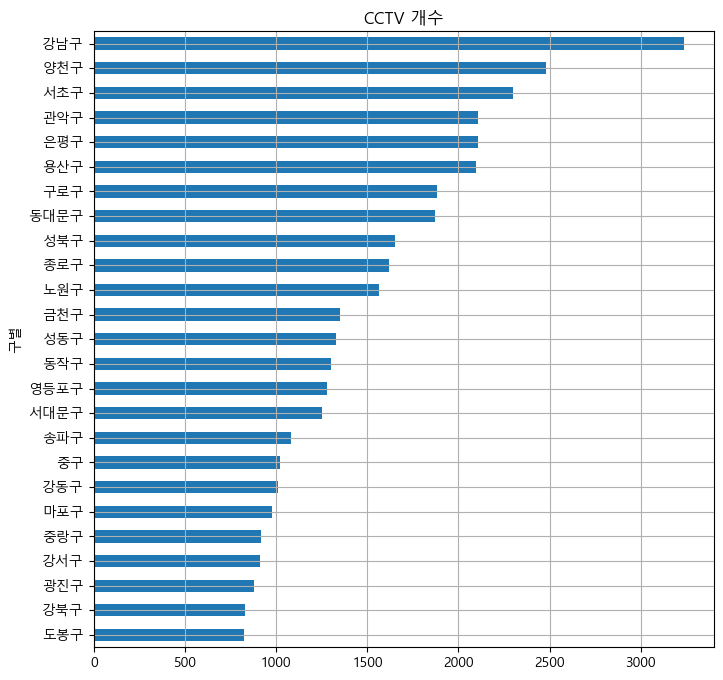

In [21]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind = "barh",
        grid = True,
        title = "CCTV 개수",
        figsize=(8,8)
    );
    
drawGraph()

- 강남구가 가장 많고, 도봉구가 가장 적다.

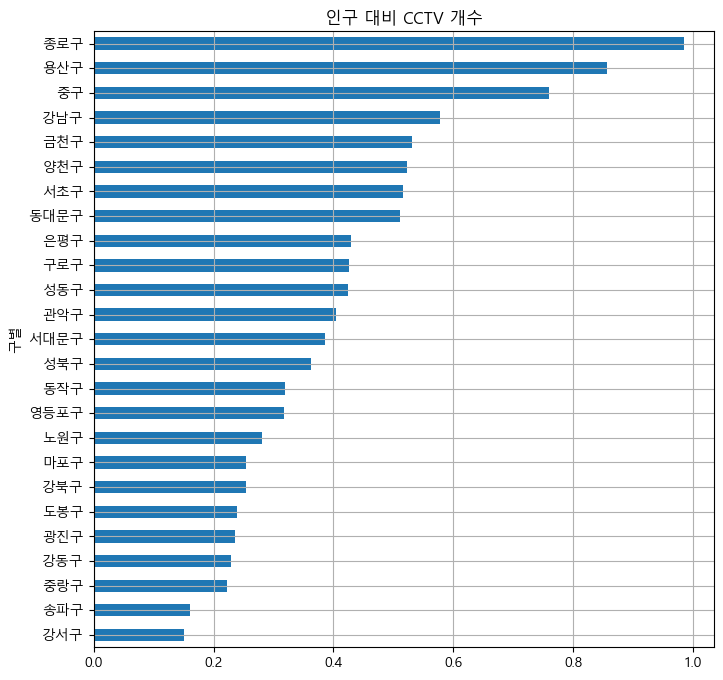

In [22]:
def drawGraph():
    data_result["CCTV 비율"].sort_values().plot(
        kind = "barh",
        grid = True,
        title = "인구 대비 CCTV 개수",
        figsize = (8,8)
    );
    
drawGraph()

- 막대그래프 분석
    - 단순 CCTV 개수 vs 인구 대비 CCTV 개수 파악
        - 단순 CCTV 수 많은 구는 강남, 양천, 서초, 관악....
        - CCTV 비율이 높은 구는 종로, 용산, 중구, 강남구 ....
    - 아직 뚜렷한 경향을 볼 수 없다. 산점도 및 경향 작업을 해보자.

### 4 - 3. 산점도 그리기
- 인구수 대비 CCTV 개수를 산점도로 나타내보자

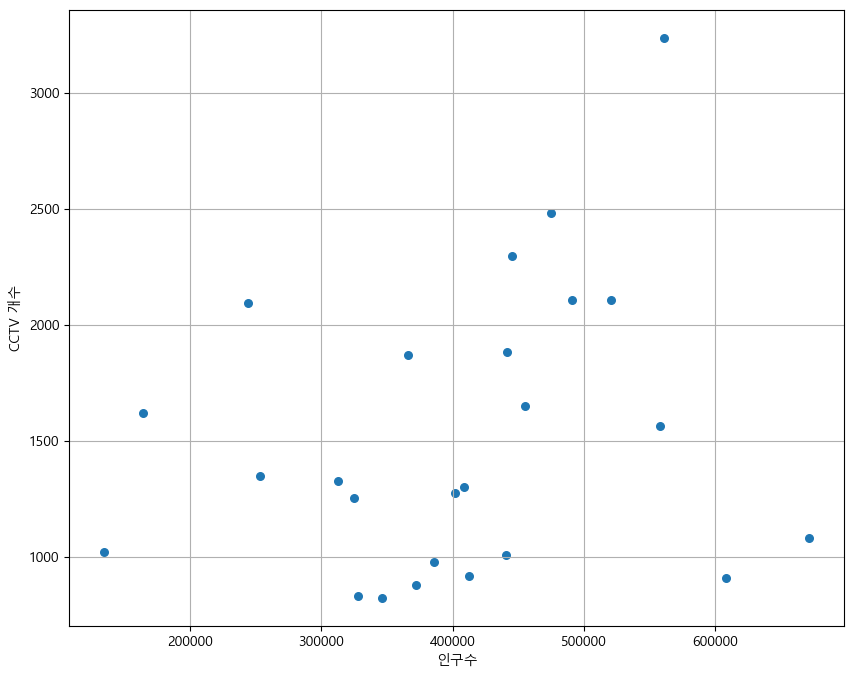

In [23]:
def drawGraph():
    plt.figure(figsize=(10,8)),
    plt.scatter(
        data_result["인구수"],
        data_result["소계"],
        s=30)
    plt.xlabel("인구수")
    plt.ylabel("CCTV 개수")
    plt.grid()
    plt.show()

drawGraph()

- 산점도 분석.
    - 아직 뚜렷한 경향을 볼 수 없다.
    - 인구수와 CCTV의 선형상관관계를 파악할 필요가 있다.

# 5. 데이터 경향(Trend) 파악

### 5 - 1. 인구수와 CCTV 개수의 상관관계를 나타내기 - 상관계수

In [75]:
## corr() 메서드는 각 열 간의 상관 계수를 반환하는 메서드.
def corr_color(value):
    color = "red"
    return "color: " + color

data_result_corr = data_result.corr(numeric_only=True)
data_result_corr.style.applymap(corr_color,subset = pd.IndexSlice[["소계"],["인구수"]])

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
소계,1.000000,-0.264375,0.232555,0.227852,0.030421,0.163905,-0.045982,-0.267385,0.503907,0.972583
최근 증가율,-0.264375,1.000000,-0.097167,-0.086343,-0.156422,-0.072251,-0.046602,0.189937,-0.004901,-0.248593
인구수,0.232555,-0.097167,1.000000,0.998151,-0.167243,0.936737,-0.601218,-0.637726,-0.618708,-0.000000
한국인,0.227852,-0.086343,0.998151,1.000000,-0.226853,0.936155,-0.645604,-0.628704,-0.618357,-0.004393
외국인,0.030421,-0.156422,-0.167243,-0.226853,1.000000,-0.175318,0.838617,-0.020583,0.116338,0.071268
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620423,-0.349188,-0.655871,-0.055458
외국인 비율,-0.045982,-0.046602,-0.601218,-0.645604,0.838617,-0.620423,1.000000,0.243374,0.502128,0.096480
고령자 비율,-0.267385,0.189937,-0.637726,-0.628704,-0.020583,-0.349188,0.243374,1.000000,0.319551,-0.122436
CCTV 비율,0.503907,-0.004901,-0.618708,-0.618357,0.116338,-0.655871,0.502128,0.319551,1.000000,0.666052
오차,0.972583,-0.248593,-0.000000,-0.004393,0.071268,-0.055458,0.096480,-0.122436,0.666052,1.000000


- 소계와 인구수의 상관관계계수를 보면 0.2 이상이다.
- 통계학에 따르면 상관계수가 0.2 ~ 0.4 이면 상관관계가 있지만 낮은 상관관계임을 의미한다고 한다.

### 5 - 2. 인구수와 CCTV 개수의 상관관계를 나타내기 - 선형회귀
- 두 데이터 변수 x와 y 사이에 상관관계식으로 직선 그래프를 그려본다.
- numpy 기능을 활용해  상관관계식 1차 함수를 만들자.
    - np.polyfit(a,b,1) : a와 b의 선형관계를 계산해 기울기와 절편을 반환해줌.
    - np.poly1d(): polyfit으로 찾은 관계식을 사용

In [24]:
import numpy as np

# 인구수와 소계 관계에서의 기울기와 절편을 구해준다, 세번쨰 인자는 찾고자 하는 함수의 차수
fp1 = np.polyfit(data_result["인구수"],data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [25]:
# fp1을 사용하기 위해 하나의 함수를 만들자.

f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [26]:
# 함수 활용 예시

f1(400000) # 인구수와 CCTV 개수의 1차식이므로 400000 인구수라면 1509.8 개의 CCTV 개수가 나온다.

1509.7809252413338

- 인구가 40만인 경우 서울시 전체 경향에 맞는 적당한 CCTV 수를 의미한다.

### 5 - 2. 경향(Trend) 시각화
- 인구수 와 CCTV 개수를 산점도로 나타내고 위에서 구한 선형관계식을 그 위에 나타내기.

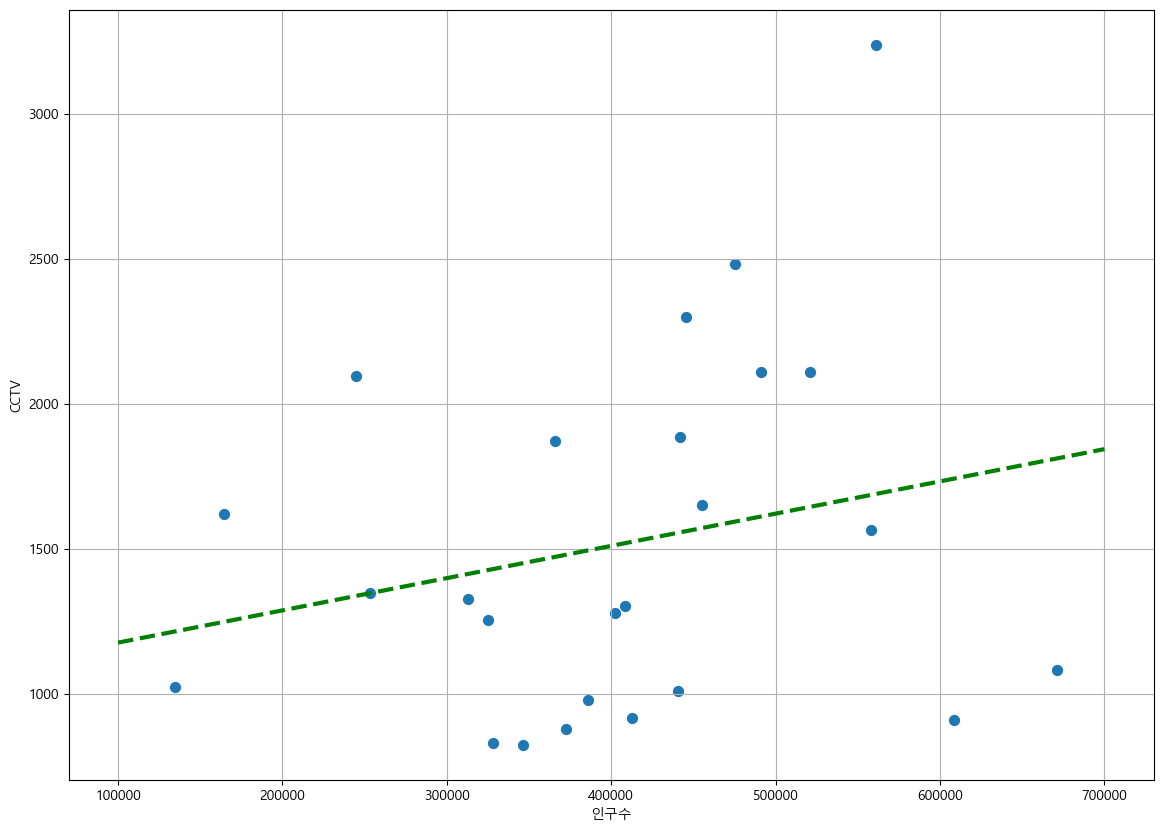

In [27]:
# x 범위 (인구수를 기준으로 만듬)
fx = np.linspace(100000, 700000, 100)
fx

def drawGraph():
    
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s = 50) # 인구수 vs CCTV 산점도
    plt.plot(fx,f1(fx), ls = "dashed", lw = 3, color = "g") # 인구수 vs CCTV 선형관계식
    
    plt.grid()
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.show()
    
drawGraph()

- 인구대비 CCTV 개수와 경향도 표현했지만 그래프 자체로는 아직 부족한 것 같다.
- 더 깊게 분석해보자.

### 5 - 3. 경향과 점간의 오차 데이터 추가
- 위에서 만든 경향선과 점들 간의 오차를 만들어 보자.
- 기울기와 절편 : fp1
- 선형관계식 : f1

In [28]:
# 경향(선형관계식)
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1) # 인구수와 소계의 선형 회귀 함수
f1 = np.poly1d(fp1)

# 오차 : 원본 데이터의 CCTV 개수(소계) - 선형관계식에 인구수를 넣은 결과 값
data_result["오차"] = round((data_result["소계"] - f1(data_result["인구수"])),2)

# 데이터 확인
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.62,561052,556164,4888,65060,0.87,11.60,0.577130,1549.20
강동구,1010,166.49,440359,436223,4136,56161,0.94,12.75,0.229358,-544.64
강북구,831,125.20,328002,324479,3523,56530,1.07,17.23,0.253352,-598.75
강서구,911,134.79,608255,601691,6564,76032,1.08,12.50,0.149773,-830.27
관악구,2109,149.29,520929,503297,17632,70046,3.38,13.45,0.404854,464.80


### 5 - 4. 오차 데이터 시각화
- 오차가 큰 상위 5개 구와 오차가 작은 하위 5개 구를 산점도에 같이 표시를 하자.
- 즉, 산점도 + 선형관계식 + 오차 데이터 를 한번에 보겠다.

In [29]:
# 오차를 내림차순, 오름차순으로 각 각 저장.

df_sort_False = data_result.sort_values(by="오차", ascending = False)# 내림차순 : 큰 값 -> 작은 값
df_sort_True = data_result.sort_values(by="오차", ascending = True)# 오름차순 : 작은 값 -> 큰 값

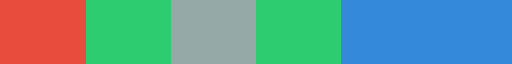

In [30]:
# 그래프에 표시할 색 지정
# colormap을 사용자 정의(user define)로 만들기
from matplotlib.colors import ListedColormap

color_step = ["#e74c3c","#2ecc71","#95a9a6","#2ecc71","#3489db","#3489db"]

# my_cmap이라는 변수로 정의함
my_cmap = ListedColormap(color_step)
my_cmap

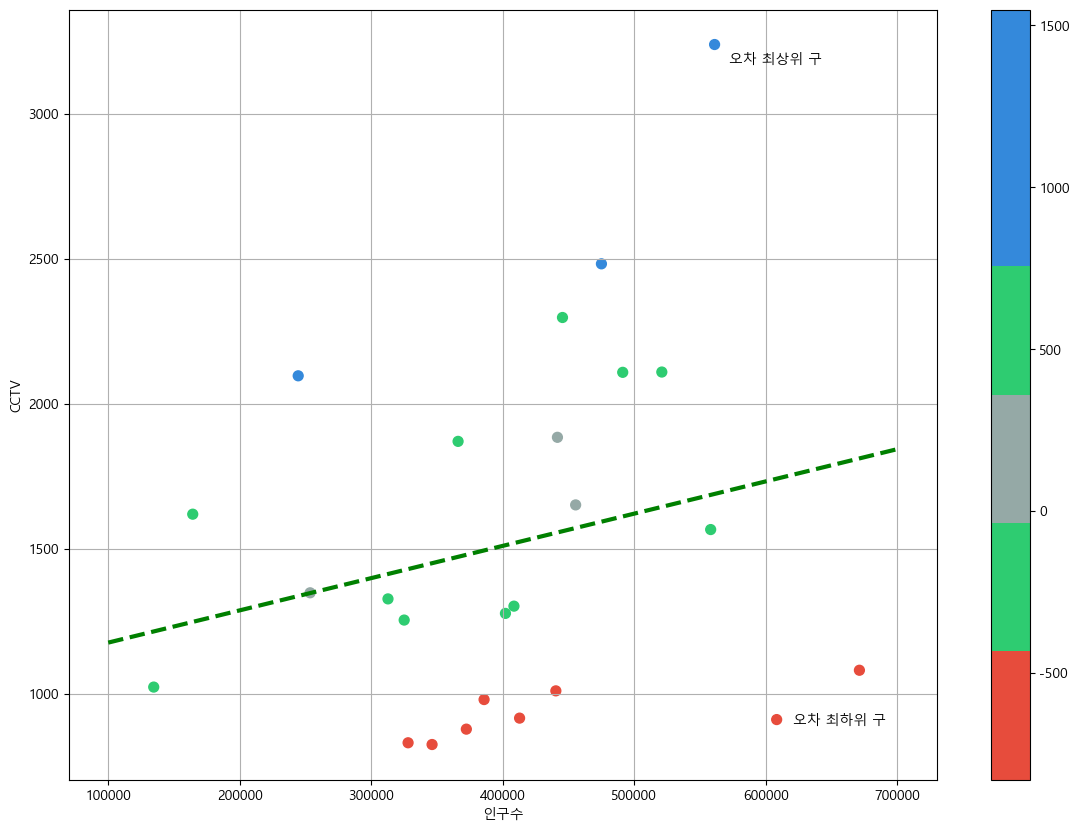

In [31]:
# 가장 큰 오차, 작은 오차의 구를 표시

def drawGraph():
    
    # 도화지
    plt.figure(figsize=(14,10))
    
    # 인구수 vs CCTV 개수 산점도
    plt.scatter(data_result["인구수"], data_result["소계"], s = 50, c = data_result["오차"], cmap = my_cmap)
    
    # 인구수 vs CCTV 개수 선형관계식
    plt.plot(fx,f1(fx), ls = "dashed", lw = 3, color = "g")
    
    # 오차 최상위, 최하위 표기, x와 y값에 계수를 곱하면 이름 위치를 조정할 수 있음
    plt.text(df_sort_False["인구수"][0] * 1.02,df_sort_False["소계"][0]* 0.98, "오차 최상위 구")
    plt.text(df_sort_True["인구수"][0] * 1.02,df_sort_True["소계"][0]* 0.98, "오차 최하위 구")

    # 그래프 튜닝
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()
    
drawGraph()

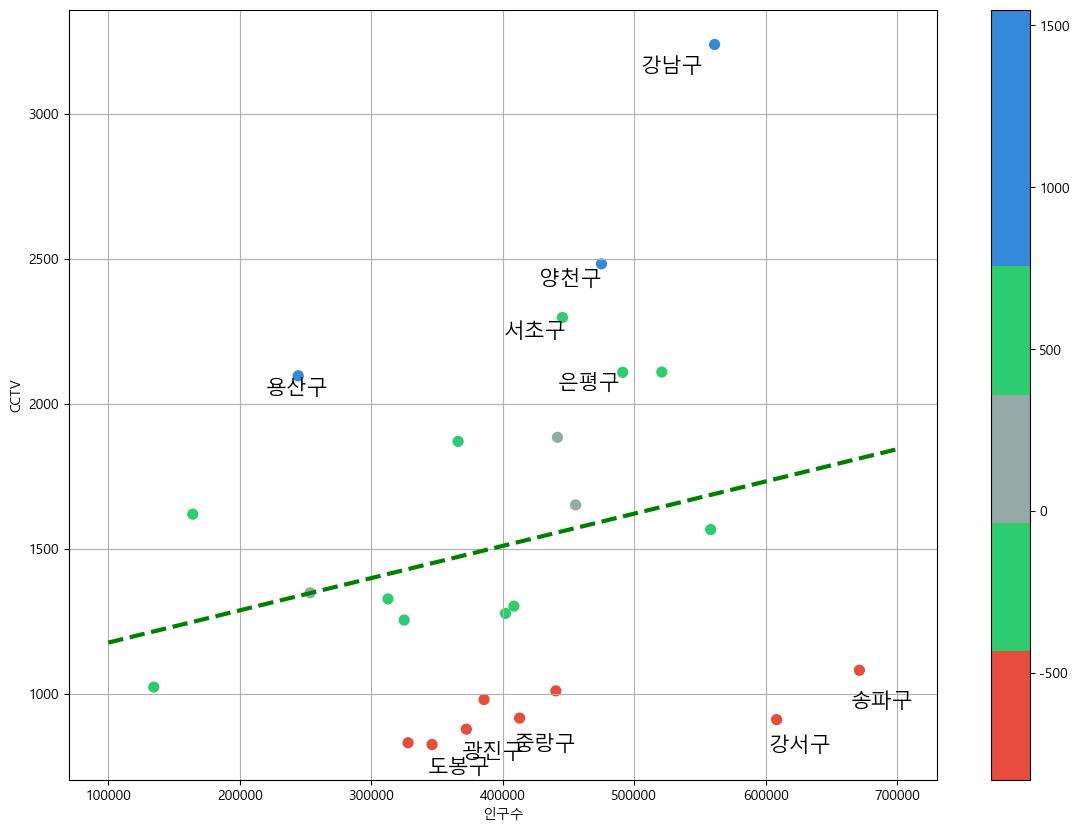

In [32]:
# 오차 상위 5개구, 하위 5개 구를 표시 해보자.

def drawGraph():
    
    # 도화지
    plt.figure(figsize=(14,10))
    
    # 인구수 vs CCTV 개수 산점도
    plt.scatter(data_result["인구수"], data_result["소계"], s = 50, c = data_result["오차"], cmap = my_cmap)
    
    # 인구수 vs CCTV 개수 선형관계식
    plt.plot(fx,f1(fx), ls = "dashed", lw = 3, color = "g")
    
    
    # 오차 상위 5개 구, 하위 5개 구 표시
    for i in range(5):
        # 상위 5개 구
        plt.text(
            df_sort_False["인구수"][i] * 0.9,
            df_sort_False["소계"][i] * 0.97,
            df_sort_False.index[i], # 원래라면 df_sort_False["구별"][i] 형식이 될것임. 근데 위에서 "구별"리스트를 인덱스로 바꾸었기 때문에 인덱스로 접근해야함.
            fontsize = 15
        )
        # 하위 5개 구
        plt.text(
            df_sort_True["인구수"][i] * 0.99,
            df_sort_True["소계"][i] * 0.88,
            df_sort_True.index[i],
            fontsize = 15
        )

    # 그래프 튜닝
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()
    
drawGraph()

- 색 설명
```
    c의 색은 x, y 의 값 기준이 아니다. c에 해당하는 값 기준으로 색을 표현해준다.
    즉, 그래프 마커는 인구수와 소계 관계의 점을 나타냈고, 그 마커의 색은 오차색으로 표현한 것이다.
    
    ==> 오차가 큰 구는 파랑, 작은 구 는 빨갛게 표시된다.
```
- 이제 경향, 오차, 그에 대한 그래프가 있어 데이터 분석을 설명할 충분한 자료다.

---

---

# 6.  결과 데이터 저장

In [33]:
# 저장 먼저
data_result.to_csv("../data/01. CCTV_result Self Summary.csv", sep = ",", encoding = "euc-kr") # euc-kr / utf-8

In [34]:
# 저장 잘 됐는지 불러서 확인
data_result = pd.read_csv("../data/01. CCTV_result Self Summary.csv", encoding="euc-kr") # Can use korean
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
0,강남구,3238,150.62,561052,556164,4888,65060,0.87,11.60,0.577130,1549.20
1,강동구,1010,166.49,440359,436223,4136,56161,0.94,12.75,0.229358,-544.64
2,강북구,831,125.20,328002,324479,3523,56530,1.07,17.23,0.253352,-598.75
3,강서구,911,134.79,608255,601691,6564,76032,1.08,12.50,0.149773,-830.27
4,관악구,2109,149.29,520929,503297,17632,70046,3.38,13.45,0.404854,464.80


---

---

# 7. 결과 분석

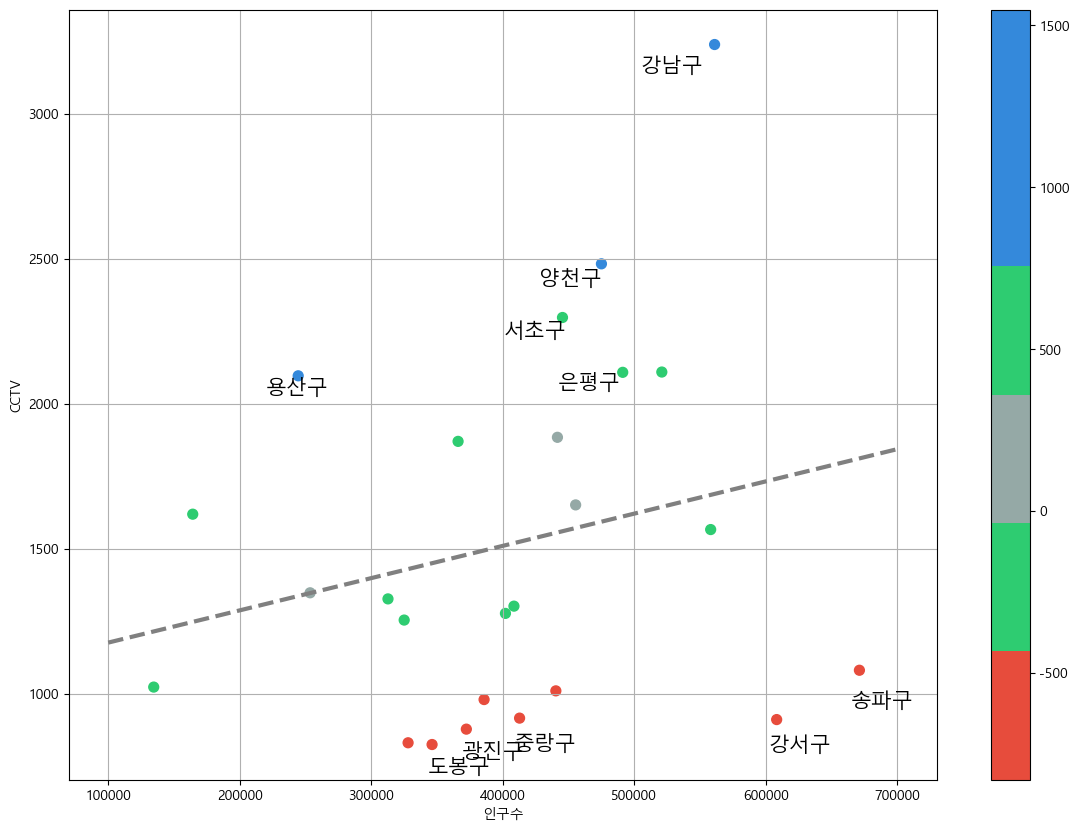

In [35]:
# 오차 상위 5개구, 하위 5개 구를 표시 해보자.

def drawGraph():
    
    # 도화지
    plt.figure(figsize=(14,10))
    
    # 인구수 vs CCTV 개수 산점도
    plt.scatter(data_result["인구수"], data_result["소계"], s = 50, c = data_result["오차"], cmap = my_cmap)
    
    # 인구수 vs CCTV 개수 선형관계식
    plt.plot(fx,f1(fx), ls = "dashed", lw = 3, color = "grey")
    
    
    # 오차 상위 5개 구, 하위 5개 구 표시
    for i in range(5):
        # 상위 5개 구
        plt.text(
            df_sort_False["인구수"][i] * 0.9,
            df_sort_False["소계"][i] * 0.97,
            df_sort_False.index[i], # 원래라면 df_sort_False["구별"][i] 형식이 될것임. 근데 위에서 "구별"리스트를 인덱스로 바꾸었기 때문에 인덱스로 접근해야함.
            fontsize = 15
        )
        # 하위 5개 구
        plt.text(
            df_sort_True["인구수"][i] * 0.99,
            df_sort_True["소계"][i] * 0.88,
            df_sort_True.index[i],
            fontsize = 15
        )

    # 그래프 튜닝
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()
    
drawGraph()

### ※ 추가로 비교해볼 수 있는 데이터

In [74]:
## corr() 메서드는 각 열 간의 상관 계수를 반환하는 메서드.
def corr_color(value):
    color = "red"
    return "color: " + color

data_result_corr = data_result.corr(numeric_only=True)
data_result_corr.style.applymap(corr_color,subset = pd.IndexSlice[["소계"],["인구수"]])

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
소계,1.000000,-0.264375,0.232555,0.227852,0.030421,0.163905,-0.045982,-0.267385,0.503907,0.972583
최근 증가율,-0.264375,1.000000,-0.097167,-0.086343,-0.156422,-0.072251,-0.046602,0.189937,-0.004901,-0.248593
인구수,0.232555,-0.097167,1.000000,0.998151,-0.167243,0.936737,-0.601218,-0.637726,-0.618708,-0.000000
한국인,0.227852,-0.086343,0.998151,1.000000,-0.226853,0.936155,-0.645604,-0.628704,-0.618357,-0.004393
외국인,0.030421,-0.156422,-0.167243,-0.226853,1.000000,-0.175318,0.838617,-0.020583,0.116338,0.071268
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620423,-0.349188,-0.655871,-0.055458
외국인 비율,-0.045982,-0.046602,-0.601218,-0.645604,0.838617,-0.620423,1.000000,0.243374,0.502128,0.096480
고령자 비율,-0.267385,0.189937,-0.637726,-0.628704,-0.020583,-0.349188,0.243374,1.000000,0.319551,-0.122436
CCTV 비율,0.503907,-0.004901,-0.618708,-0.618357,0.116338,-0.655871,0.502128,0.319551,1.000000,0.666052
오차,0.972583,-0.248593,-0.000000,-0.004393,0.071268,-0.055458,0.096480,-0.122436,0.666052,1.000000


# 결과 분석

- 인구수와 CCTV 개수의 상관계수가 0.233임 과 선형회귀 직선이 우상향을 보임
    - 상관관계는 있지만 약한 상관관계임을 도출해 낼수 있다.

- 인구수 대비 CCTV가 많은 구
    - 종로, 용산, 중구 ...
- 인구수 대비 CCTV가 적은 구
    - 강서구, 송파구, 중랑구 ...

- 경향에 비해 오차가 가장 큰 구
    - 강남구 : CCTV가 경향보다 너무 많다.
    - 강서구 : CCTV가 경향보다 너무 많다.